<a href="https://colab.research.google.com/github/Muhammadsulton1/ML/blob/main/%D1%80%D0%B5%D0%B3%D1%80%D0%B5%D1%81%D1%81%D0%B8%D0%BE%D0%BD%D0%BD%D1%8B%D0%B9_%D0%B0%D0%BD%D0%B0%D0%BB%D0%B8%D0%B7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
data = pd.read_csv('pimdb.csv',sep=';')

In [ ]:
data.head()

,Title,ImdbRating,RatingCount,Duration,Type,WinsCount,NominationsCount,PhotosCount,NewsArticlesCount,UserReviewsCount
0,der vagabund und das kind,8.4,40550.0,3240.0,video.movie,1.0,0.0,19.0,96.0,85.0
1,goldrausch,8.3,45319.0,5700.0,video.movie,2.0,1.0,35.0,NaN,122.0
2,metropolis,8.4,81007.0,9180.0,video.movie,3.0,4.0,67.0,428.0,376.0
3,der general,8.3,37521.0,6420.0,video.movie,1.0,1.0,53.0,123.0,219.0
4,lichter der gro stadt,8.7,70057.0,5220.0,video.movie,2.0,0.0,38.0,187.0,186.0


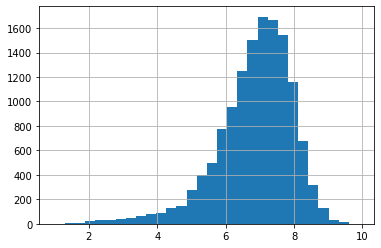

In [ ]:
data['ImdbRating'].hist(bins=30);

#имеем близкое к нормальному распределение скошенное вправо

#применяем логарифмирование, поскольку дело имели с лог нормальным расприделением

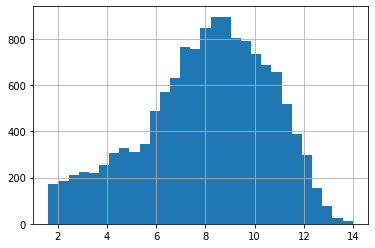

In [ ]:
np.log(data['RatingCount']).hist(bins=30)

#преоразуем логнорм распределение в нормальное

In [ ]:
data['RatingCount'] = np.log(data['RatingCount'])

#посмотрим описательные статистики

In [ ]:
data.describe()

,ImdbRating,RatingCount,Duration,WinsCount,NominationsCount,PhotosCount,NewsArticlesCount,UserReviewsCount
count,13551.000000,13551.000000,13745.000000,14740.000000,14750.000000,14749.000000,14755.000000,14760.000000
mean,6.865707,8.010838,5424.595417,3.094912,4.514847,23.564852,248.316232,103.246545
std,1.119515,2.578092,2784.823414,9.232477,16.188559,65.308934,1051.450455,229.113560
min,1.000000,1.609438,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.300000,6.401087,3720.000000,0.000000,0.000000,0.000000,0.000000,3.000000
50%,7.000000,8.288283,5700.000000,0.000000,0.000000,7.000000,8.000000,30.000000
75%,7.600000,9.945517,6660.000000,2.000000,3.000000,26.000000,101.000000,103.000000
max,9.900000,13.983898,68400.000000,226.000000,542.000000,2810.000000,32345.000000,4928.000000


# по описательным статистикам видно, что у колонок c Count имеется сильный разброс между средним и медианной

In [ ]:
data.shape

(14761, 10)

# посмотрим на боксплоты

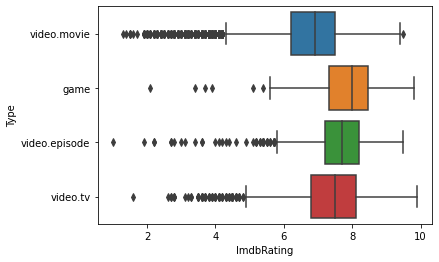

In [ ]:
ax = sns.boxplot(x="ImdbRating", y="Type", data=data)

# мы имеем многочисленные выбросы как показано на боксплоте

Отбираем только те столбцы, которые относятся к фильмам, а серила итп отбрасываем 

In [ ]:
data = data[data['Type'] == 'video.movie']

In [ ]:
data = data.drop(['Type','Title'],axis = 1)

#посмотрим на размерность датасета после отбора значений только для фильма

In [ ]:
data.shape

(11072, 8)

In [ ]:
#функция для просмотра какой процент пропущенных данных мы имеем
def missing_values_table(data):
        # Общее количество пропущенных значений
        mis_val = data.isnull().sum()
        # Доля пропущенных значений
        mis_val_percent = 100 * data.isnull().sum() / len(data)
        # Таблица с результатом расчета
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        # Переименовываем столбцы
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        # Сортируем по столбцу с долей пропущенных значений в порядке убывания
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        # Вывод сводной информации
        print("Ваш датафрейм имеет " + str(data.shape[1]) + " колонок.\n"      
            " " + str(mis_val_table_ren_columns.shape[0]) +
              " колонок имееют пропущенные данные.")
        return mis_val_table_ren_columns

# Статистика пропущенных значений
missing_values = missing_values_table(data)
missing_values.head(10)

Ваш датафрейм имеет 8 колонок.
 7 колонок имееют пропущенные данные.


,Missing Values,% of Total Values
Duration,456,4.1
ImdbRating,251,2.3
RatingCount,251,2.3
WinsCount,18,0.2
NominationsCount,9,0.1
PhotosCount,8,0.1
NewsArticlesCount,5,0.0


In [ ]:
data['ImdbRating'] = data['ImdbRating'].fillna(data['ImdbRating'].median())

In [ ]:
#data = data.dropna(subset=['Duration'],axis=0)

#удалим пропушенные значения по строкам содержащие nan

In [ ]:
data = data.dropna(axis=0)

In [ ]:
print(data.shape)
data.head()

(10437, 8)


,ImdbRating,RatingCount,Duration,WinsCount,NominationsCount,PhotosCount,NewsArticlesCount,UserReviewsCount
0,8.4,10.610291,3240.0,1.0,0.0,19.0,96.0,85.0
2,8.4,11.302291,9180.0,3.0,4.0,67.0,428.0,376.0
3,8.3,10.532656,6420.0,1.0,1.0,53.0,123.0,219.0
4,8.7,11.157064,5220.0,2.0,0.0,38.0,187.0,186.0
6,8.3,10.747272,6300.0,4.0,1.0,40.0,183.0,211.0


Посмотрим на матрицу корреляций

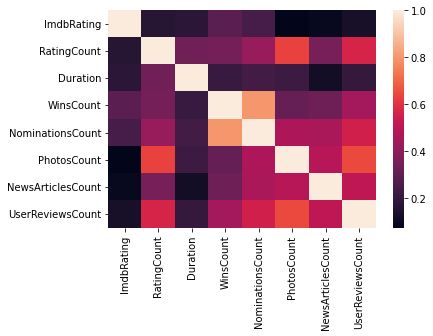

In [ ]:
sns.heatmap(data.corr());

#заменем значения video.movie на 1

In [ ]:
data.shape

(10437, 8)

#для наших данных с логнормальным распределением применем логарифмирование + 1 , чтобы избежать ошибки из-за 0

In [ ]:
for i in data.columns:
  data[i] = data[i].apply(lambda x: np.log(x + 1))

#для удаление анамолий используем правило 3х сигм

In [ ]:
def outlier_std(data, col, threshold=3):
    """
        Вычисляет для каждой строки является ли она аномалией
    """
    
    mean = data[col].mean()
    std = data[col].std()
    
    up_bound = mean + threshold * std
    low_bound = mean - threshold * std
    
    anomalies = pd.concat([data[col] > up_bound, data[col] < low_bound], axis=1).any(axis=1)
    return anomalies, up_bound, low_bound

In [ ]:

a,l,r = outlier_std(data, data.columns)
l

ImdbRating            2.510242
RatingCount           3.069863
Duration             10.110448
WinsCount             3.818156
NominationsCount      4.169007
PhotosCount           6.720943
NewsArticlesCount    10.376859
UserReviewsCount      8.705418
dtype: float64

In [ ]:
def get_column_outliers(data, function=outlier_std, threshold=3):
       
    # дополнительная колонка с отметкой является ли конкретное наблюдение аномалией
    outliers = pd.Series(data=[False]*len(data), index=data.index, name='is_outlier')
    
    # табличка для статистики по каждой колонке
    comparison_table = {}
    
    for column in data.columns:
        anomalies, upper_bound, lower_bound = function(data, column, threshold=threshold)
        comparison_table[column] = [upper_bound, lower_bound, sum(anomalies), 100*sum(anomalies)/len(anomalies)]
        outliers.loc[anomalies[anomalies].index] = True    
        
    comparison_table = pd.DataFrame(comparison_table).T
    comparison_table.columns=['upper_bound', 'lower_bound', 'anomalies_count', 'anomalies_percentage']
    return comparison_table, outliers

In [ ]:
comparison_table, std_outliers = get_column_outliers(data)

# статистика по каждой колонке и числу аномалий в ней
comparison_table

,upper_bound,lower_bound,anomalies_count,anomalies_percentage
ImdbRating,2.510242,1.559323,199.0,1.906678
RatingCount,3.069863,1.383339,214.0,2.050398
Duration,10.110448,7.190872,300.0,2.874389
WinsCount,3.818156,-2.203727,91.0,0.871898
NominationsCount,4.169007,-2.499225,47.0,0.450321
PhotosCount,6.720943,-2.021778,0.0,0.000000
NewsArticlesCount,10.376859,-4.223344,0.0,0.000000
UserReviewsCount,8.705418,-0.959081,0.0,0.000000


In [ ]:
# какие наблюдения являются аномалиями, а какие нет 
std_outliers

0        False
2        False
3        False
4        False
6        False
         ...  
14666     True
14673    False
14686    False
14698    False
14744    False
Name: is_outlier, Length: 10437, dtype: bool

In [ ]:
def anomalies_report(outliers):
    print("Total number of outliers: {}\nPercentage of outliers:   {:.2f}%".format(
            sum(outliers), 100*sum(outliers)/len(outliers)))

In [ ]:
anomalies_report(std_outliers)

Total number of outliers: 739
Percentage of outliers:   7.08%


In [ ]:
labeled_df = data.copy()
labeled_df['is_outlier'] = std_outliers

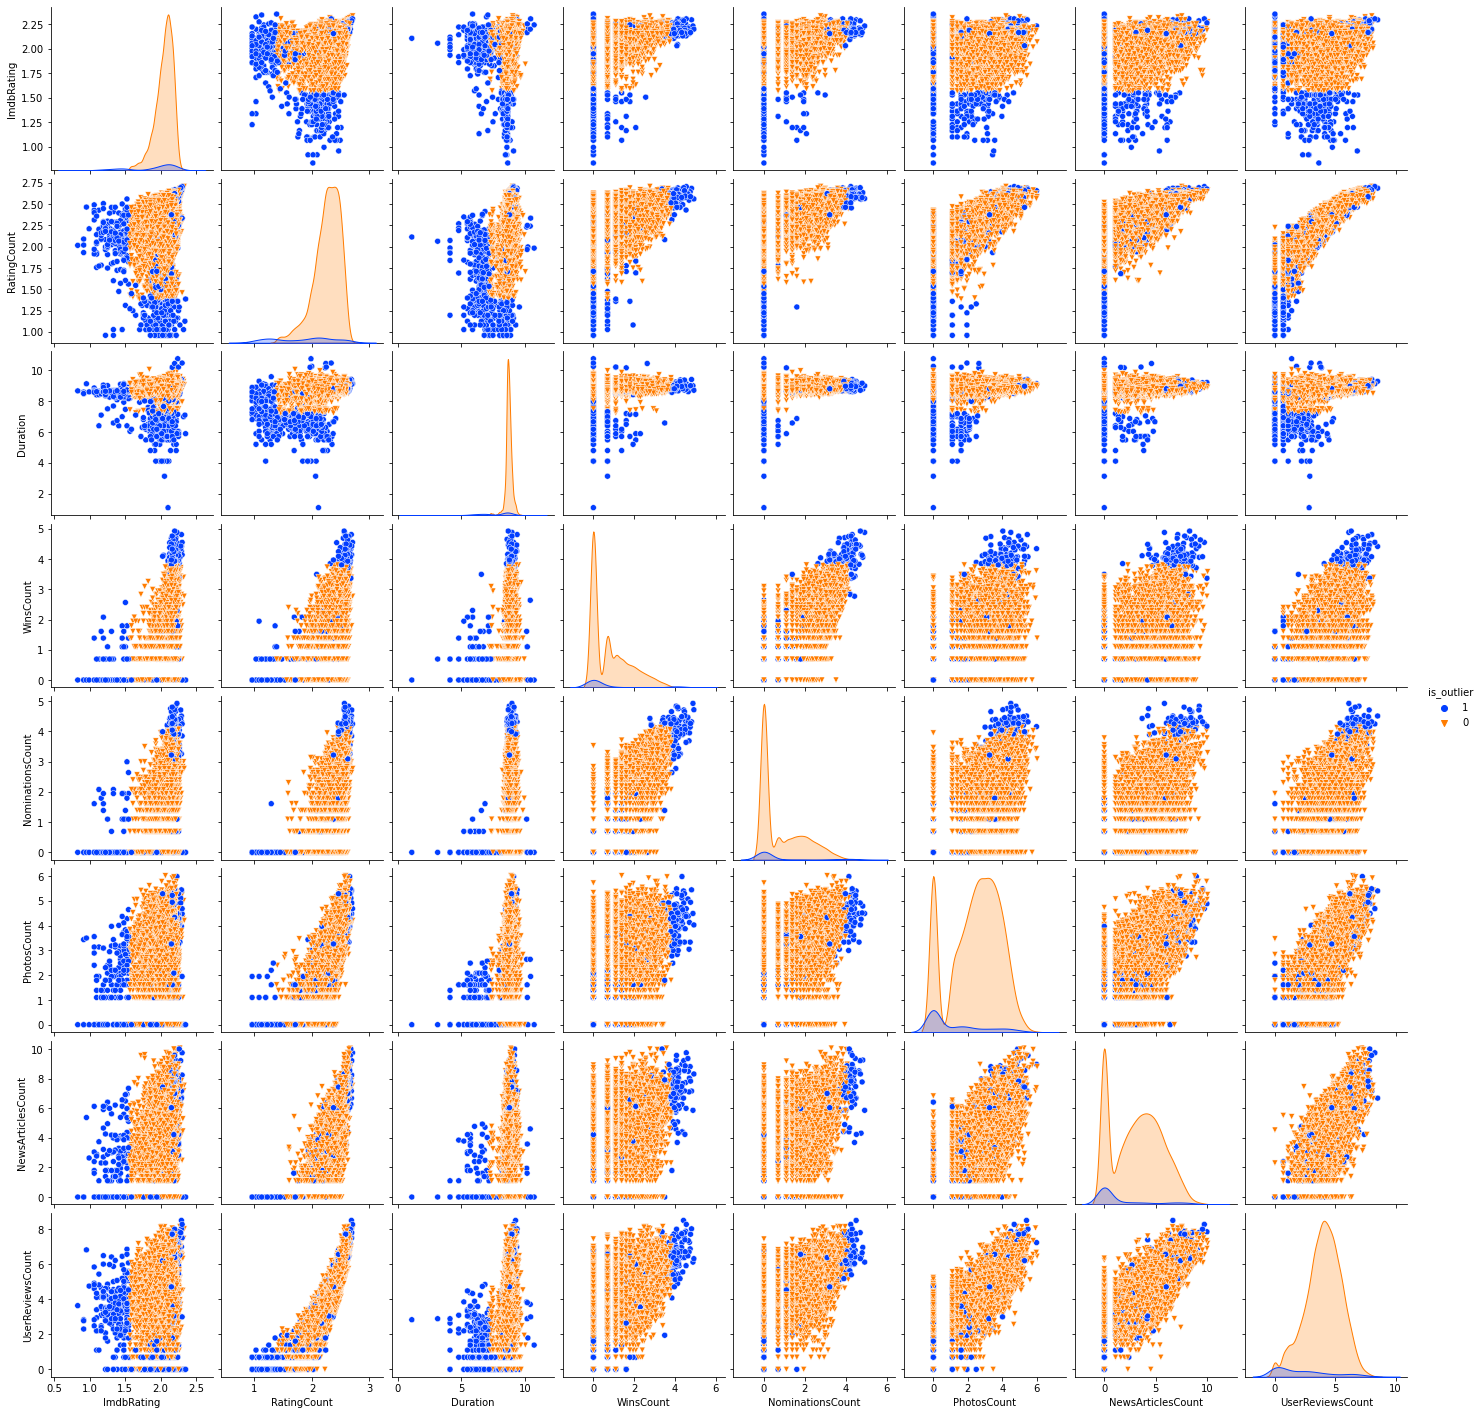

In [ ]:
sns.pairplot(data=labeled_df, vars=data.columns,
             hue='is_outlier', hue_order=[1, 0],
             markers=['v', 'o'],  palette='bright');

In [ ]:
train = labeled_df[labeled_df['is_outlier']==False]

In [ ]:
train = train.drop(['is_outlier'],axis=1)
train.head()

,ImdbRating,RatingCount,Duration,WinsCount,NominationsCount,PhotosCount,NewsArticlesCount,UserReviewsCount
0,2.240710,2.451892,8.083637,0.693147,0.000000,2.995732,4.574711,4.454347
2,2.240710,2.509785,9.124891,1.386294,1.609438,4.219508,6.061457,5.932245
3,2.230014,2.445183,8.767329,0.693147,0.693147,3.988984,4.820282,5.393628
4,2.272126,2.497910,8.560444,1.098612,0.000000,3.663562,5.236442,5.231109
6,2.230014,2.463621,8.748464,1.609438,0.693147,3.713572,5.214936,5.356586


In [ ]:
train.shape

(9698, 8)

# разделим нашу выборку на тренировочную и тестовую

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.metrics import r2_score, mean_absolute_error
from sklearn.pipeline import Pipeline
from sklearn.impute import KNNImputer

#Выбираем целевую метку и признаки

In [ ]:
X = train.drop(['ImdbRating'],axis=1)
y = train['ImdbRating']

In [ ]:
imputer = KNNImputer(n_neighbors=3)
X = imputer.fit_transform(X)

стандартизируем наши признаки, чтобы до начала обучения все признаки были равны по своему возможному влиянию.

In [ ]:
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [ ]:
def train_model(model,X_train,y_train,X_test,y_test,feature_names,forest=False):
  model.fit(X_train,y_train)
  #для лин моделей и случайного леса
  print("MAE=%f" % mean_absolute_error(y_test,model.predict(X_test)))
  print("r2_score=%f" % r2_score(y_test,model.predict(X_test)))
  print("coef of model")
  coef = model.feature_importances_ if forest else model.coef_
  coef_name = 'Importance' if forest else 'Coef'
  return pd.DataFrame(coef,feature_names,columns=[coef_name]).sort_values(by=coef_name,ascending=False)

In [ ]:
linear = LinearRegression()

In [ ]:
#как видим ветер негативно влияет на прокат велосипедов потому что значение его коэффициента отрицательный
train_model(linear,X_train,y_train,X_test,y_test,feature_names=train.columns[1:])

MAE=0.087523
r2_score=0.185686
coef of model


,Coef
WinsCount,0.215399
RatingCount,0.139597
Duration,0.050406
NewsArticlesCount,-0.022481
NominationsCount,-0.026188
UserReviewsCount,-0.057040
PhotosCount,-0.082870


# при всех признаках у нас коэффициент детерминации равен 0.1592

# используем регеляризацию

In [ ]:
from sklearn.linear_model import RidgeCV

In [ ]:
ridgecv = RidgeCV()

In [ ]:
#как видим ветер негативно влияет на прокат велосипедов потому что значение его коэффициента отрицательный
train_model(ridgecv,X_train,y_train,X_test,y_test,feature_names=train.columns[1:])

MAE=0.087521
r2_score=0.185527
coef of model


,Coef
WinsCount,0.214224
RatingCount,0.135219
Duration,0.050002
NewsArticlesCount,-0.022452
NominationsCount,-0.025109
UserReviewsCount,-0.053794
PhotosCount,-0.082226


#Случайный лес

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
forest = RandomForestRegressor()
train_model(forest,X_train,y_train,X_test,y_test,feature_names=train.columns[1:],forest=True)

MAE=0.083173
r2_score=0.232044
coef of model


,Importance
RatingCount,0.242582
Duration,0.174899
UserReviewsCount,0.165235
WinsCount,0.151249
PhotosCount,0.118455
NewsArticlesCount,0.109133
NominationsCount,0.038447


# столбец NominationsCount не вносит особой полезной информации, поэтому вернемся на вверх и удалим его из признака

#Полиномиальная регрессия

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
polynomial_features= PolynomialFeatures(degree=2)
x_poly = polynomial_features.fit_transform(X)

In [ ]:
model = LinearRegression()
model.fit(x_poly, y)
y_poly_pred = model.predict(x_poly)

rmse = mean_absolute_error(y,y_poly_pred)
r2 = r2_score(y,y_poly_pred)
print(rmse)
print(r2)

0.08453294309863087
0.20851641190427772


In [ ]:
cross_val_score(forest,x_poly,y,cv=5,scoring='r2').mean()

0.0316657073431589